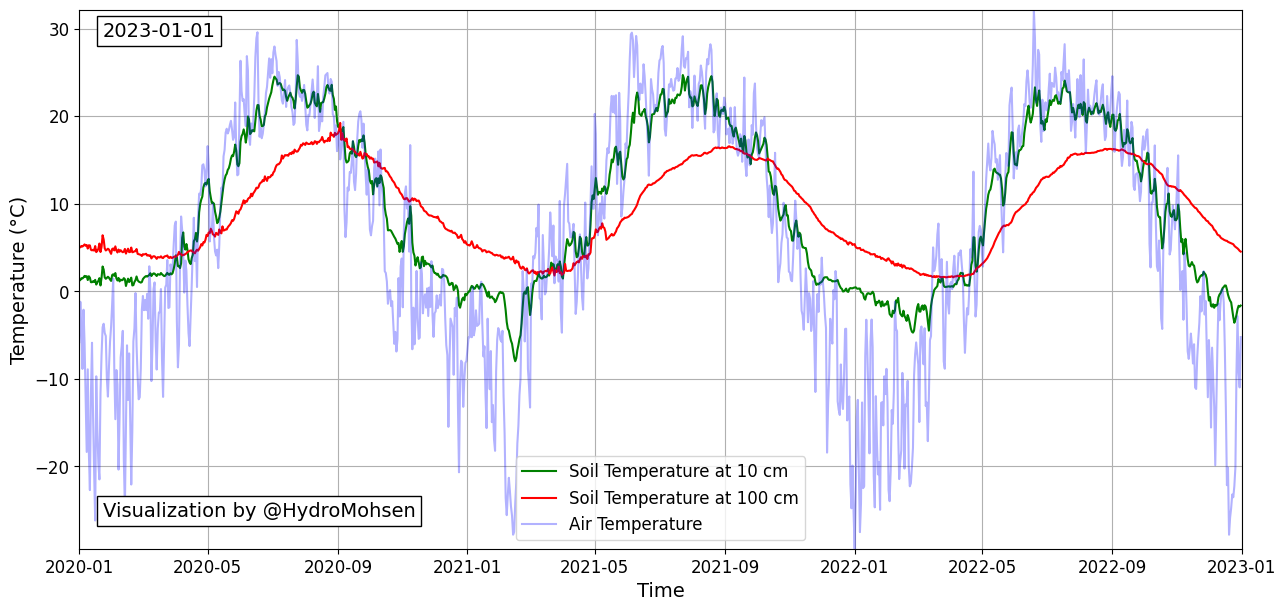

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation


url = "/content/Fargo_daily.csv" # Replace with the link to your CSV file if you're using Google Colab
df = pd.read_csv(url)

# Convert 'Time (CST)' to datetime format
df['Time (CST)'] = pd.to_datetime(df['Time (CST)'])

# Filter based on the date range from 2020 to 2023
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-01-01')
filtered_df = df[(df['Time (CST)'] >= start_date) & (df['Time (CST)'] <= end_date)]

# Reset the index of filtered_df
filtered_df = filtered_df.reset_index(drop=True)

# Convert filtered dates to datetime format
dates = pd.to_datetime(filtered_df['Time (CST)'])

# Function to update the animation
def update(num, x, y1, y3, y_air, line1, line3, line_air, date_text):
    line1.set_data(x[:num], y1[:num])
    line3.set_data(x[:num], y3[:num])
    line_air.set_data(x[:num], y_air[:num])
    date_text.set_text(x[num].strftime('%Y-%m-%d'))
    return line1, line3, line_air, date_text

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(15,7))
line1, = ax.plot([], [], 'g-', label='Soil Temperature at 10 cm')
line3, = ax.plot([], [], 'r-', label='Soil Temperature at 100 cm')
line_air, = ax.plot([], [], 'b-', label='Air Temperature', alpha=0.3)
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white'))
text1 = ax.text(0.02, 0.06, 'Visualization by @HydroMohsen', transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white'))


# Set axis properties
ax.set_xlim(dates.min(), dates.max())
ax.set_ylim(min(filtered_df['ST_10 cm_C'].min(), filtered_df['ST_100 cm_C'].min(), filtered_df['AvgAirTemp_C'].min()),
            max(filtered_df['ST_10 cm_C'].max(), filtered_df['ST_100 cm_C'].max(), filtered_df['AvgAirTemp_C'].max()))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)

# Create the animation
ani = animation.FuncAnimation(fig, update, len(dates), fargs=[dates, filtered_df['ST_10 cm_C'], filtered_df['ST_100 cm_C'], filtered_df['AvgAirTemp_C'], line1, line3, line_air, date_text], interval=50, blit=True)

# Save the animation as a video file
ani.save('soil_air_temperature_animation.mp4', writer='ffmpeg', fps=30)
